# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

In [7]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'

In [8]:
output_folder = '../data/raw'
output_filepath = os.path.join(output_folder, 'demographic_health_data.csv')

In [9]:
print(f"La carpeta de destino calculada es: '{output_folder}'")
print(f"La ruta completa del archivo de salida es: '{output_filepath}'")

La carpeta de destino calculada es: '../data/raw'
La ruta completa del archivo de salida es: '../data/raw\demographic_health_data.csv'


In [10]:
df_raw = pd.read_csv(url)

In [11]:
df_raw.to_csv(output_filepath, index=False)
print(f"Dataset saved succesfully in: '{output_filepath}'")

Dataset saved succesfully in: '../data/raw\demographic_health_data.csv'


In [12]:
input_filepath = '../data/raw/demographic_health_data.csv'

In [13]:
df = pd.read_csv(input_filepath)

In [14]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [22]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [16]:
df.shape

(3140, 108)

In [17]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [18]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [19]:
df.describe(include='object')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [20]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [26]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)

In [27]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [34]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0].sort_values(ascending=False)
print(null_columns)

Series([], dtype: int64)


In [33]:
null_columns

Series([], dtype: int64)

In [35]:
for col in df.columns.tolist():
    print(col)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [40]:
target_variable = 'diabetes_prevalence'

In [41]:
print(df[target_variable].describe())

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64


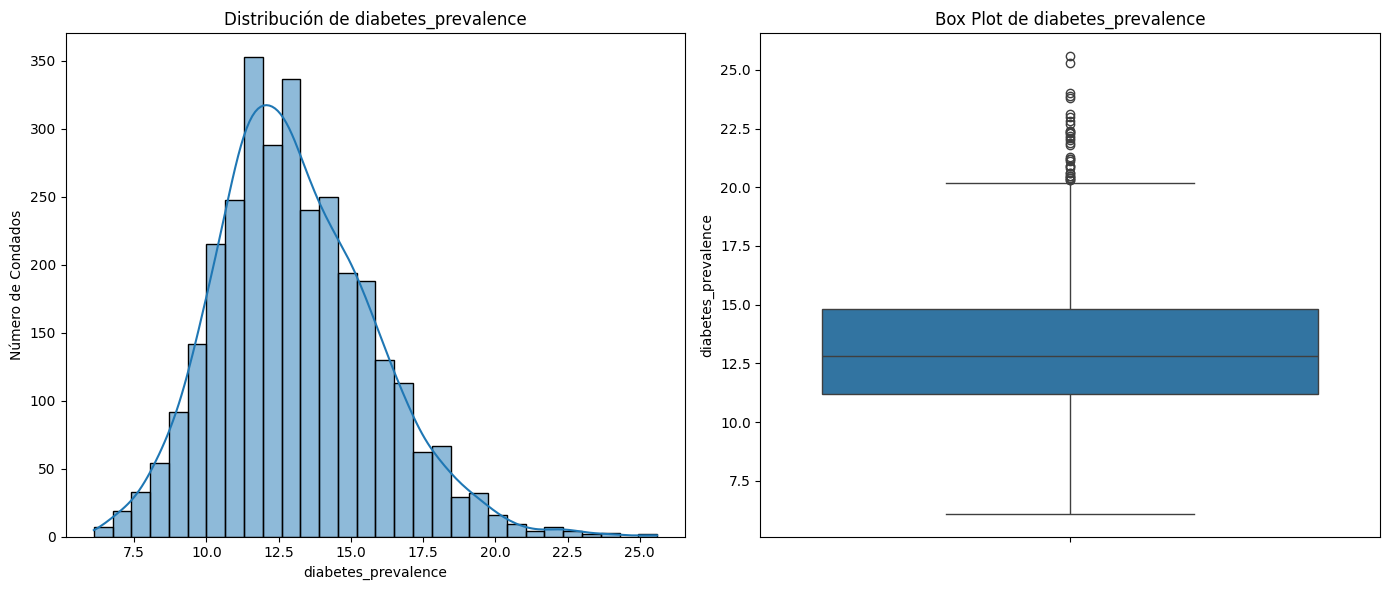

In [45]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(df[target_variable], kde=True, bins=30) 
plt.title(f'Distribución de {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Número de Condados')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target_variable])
plt.title(f'Box Plot de {target_variable}')
plt.ylabel(target_variable)

plt.tight_layout()
plt.show()


In [47]:
cols_to_exclude = [
    'State_FIPS_Code',
    'County_FIPS_Code',
    'fips',
    'TOT_POP', 
    'POP_ESTIMATE_2018',
    'N_POP_CHG_2018',
    'GQ_ESTIMATES_2018',
    'CI90LBINC_2018', 
    'CI90UBINC_2018',
    'county_pop2018_18 and older',
    'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
    'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
    'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
    'COPD_Lower 95% CI', 'COPD_Upper 95% CI',
    'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 
    'CKD_Lower 95% CI', 'CKD_Upper 95% CI',
    'Obesity_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'anycondition_number' # Son conteos, no tasas
]

In [49]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

In [51]:
correlation_matrix = df[numeric_cols].corr()

In [52]:
target_correlations = correlation_matrix[target_variable].sort_values(ascending=False)

In [53]:
target_correlations

diabetes_prevalence                                             1.000000
CKD_prevalence                                                  0.918514
anycondition_prevalence                                         0.850219
PCTPOV017_2018                                                  0.840088
PCTPOV517_2018                                                  0.833527
                                                                  ...   
% White-alone                                                  -0.410392
Med_HH_Income_Percent_of_State_Total_2018                      -0.561531
Percent of adults with a bachelor's degree or higher 2014-18   -0.669985
MEDHHINC_2018                                                  -0.723316
Median_Household_Income_2018                                   -0.723316
Name: diabetes_prevalence, Length: 80, dtype: float64

In [57]:
target_correlations.head(10)

diabetes_prevalence                                               1.000000
CKD_prevalence                                                    0.918514
anycondition_prevalence                                           0.850219
PCTPOV017_2018                                                    0.840088
PCTPOV517_2018                                                    0.833527
Heart disease_prevalence                                          0.831021
COPD_prevalence                                                   0.789044
PCTPOVALL_2018                                                    0.735489
Obesity_prevalence                                                0.699402
Percent of adults with less than a high school diploma 2014-18    0.699251
Name: diabetes_prevalence, dtype: float64

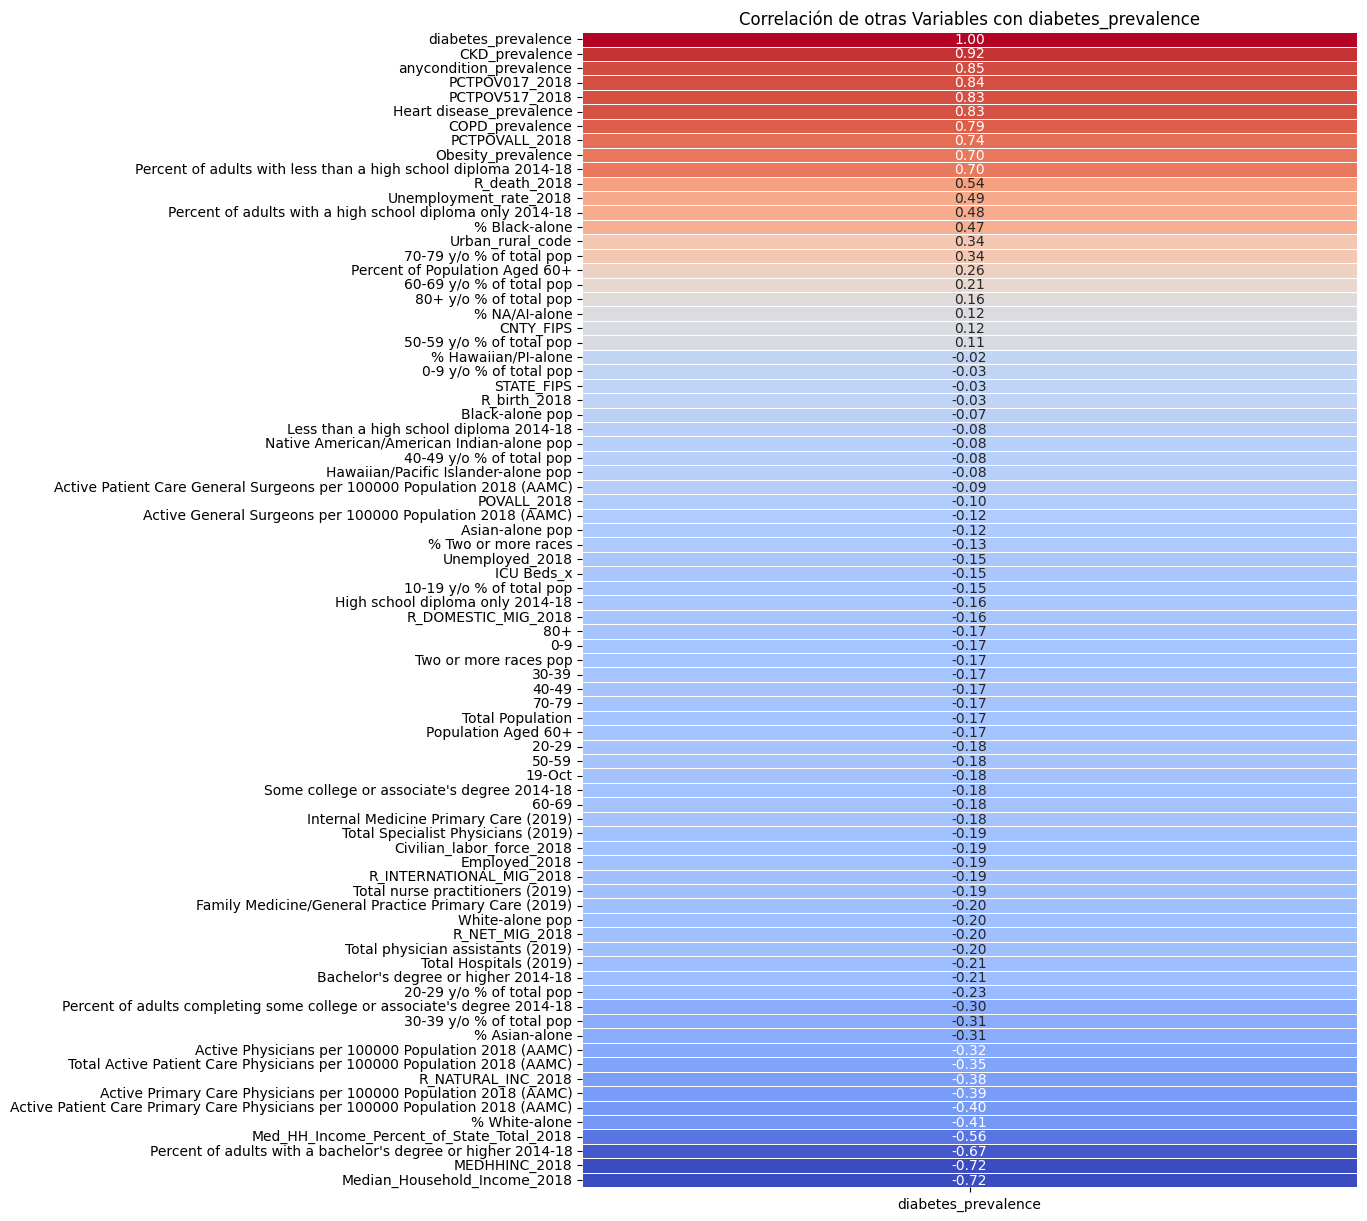

In [54]:
plt.figure(figsize=(10, 15))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10}, cbar=False)
plt.title(f'Correlación de otras Variables con {target_variable}')
plt.show()

In [55]:
Q1 = df[target_variable].quantile(0.25)
Q3 = df[target_variable].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[target_variable] < lower_bound) | (df[target_variable] > upper_bound)]

print(f"\n--- Outliers detectados en '{target_variable}' (usando método IQR) ---")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Límite Inferior (Lower Bound): {lower_bound:.2f}, Límite Superior (Upper Bound): {upper_bound:.2f}")
print(f"Número de outliers en '{target_variable}': {len(outliers)}")
print("-" * 50)


--- Outliers detectados en 'diabetes_prevalence' (usando método IQR) ---
Q1: 11.20, Q3: 14.80, IQR: 3.60
Límite Inferior (Lower Bound): 5.80, Límite Superior (Upper Bound): 20.20
Número de outliers en 'diabetes_prevalence': 33
--------------------------------------------------


In [59]:
features = [
    'Median_Household_Income_2018', 
    "Percent of adults with a bachelor's degree or higher 2014-18", 
    'PCTPOVALL_2018', 
    'Obesity_prevalence', 
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total nurse practitioners (2019)',
    'Total Hospitals (2019)',
    'Heart disease_prevalence',
    'COPD_prevalence',
    'CKD_prevalence',
    'anycondition_prevalence' 
]

In [62]:
X = df[features]
y = df[target_variable]

In [64]:
X

,Median_Household_Income_2018,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,Obesity_prevalence,Active Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total Hospitals (2019),Heart disease_prevalence,COPD_prevalence,CKD_prevalence,anycondition_prevalence
0,59338,27.7,13.8,35.8,217.1,28.859137,1.148905,7.9,8.6,3.1,47.6
1,57588,31.3,9.8,29.7,217.1,113.162114,4.505074,7.8,8.6,3.2,40.2
2,34382,12.2,30.9,40.7,217.1,12.914231,0.514126,11.0,12.1,4.5,57.5
3,46064,11.5,21.8,38.7,217.1,11.626493,0.462860,8.6,10.0,3.3,51.6
4,50412,12.6,13.2,34.0,217.1,30.021267,1.195171,9.2,10.5,3.4,46.3
...,...,...,...,...,...,...,...,...,...,...,...
3135,73315,22.0,8.4,33.6,207.9,21.311749,2.160982,5.9,6.6,2.6,40.3
3136,99087,57.4,6.3,19.4,207.9,11.425901,1.158570,5.2,4.9,2.4,24.3
3137,63401,15.4,10.0,34.2,207.9,10.048714,1.018926,7.2,8.0,3.0,42.2
3138,55190,21.5,11.9,28.4,207.9,3.903350,0.395794,8.2,8.3,3.4,37.5


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
scaler = StandardScaler()

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test_scaled)

In [73]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

In [74]:
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Cuadrático Medio (MSE): 0.41
Raíz del Error Cuadrático Medio (RMSE): 0.64
Coeficiente de Determinación (R^2): 0.95


In [75]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                              Feature  Coefficient
9                                      CKD_prevalence     2.295877
10                            anycondition_prevalence     0.936987
8                                     COPD_prevalence     0.769058
0                        Median_Household_Income_2018     0.357974
2                                      PCTPOVALL_2018     0.236124
5                    Total nurse practitioners (2019)     0.156595
1   Percent of adults with a bachelor's degree or ...     0.089206
3                                  Obesity_prevalence     0.017918
6                              Total Hospitals (2019)    -0.052506
4   Active Physicians per 100000 Population 2018 (...    -0.228157
7                            Heart disease_prevalence    -1.064807
